<a href="https://colab.research.google.com/github/Reshma70/task-1/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (2).zip to archive (2) (1).zip
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Mean:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Transaction ID               1
Date                2023-05-16
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
Name: 0, dtype: object

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.68135

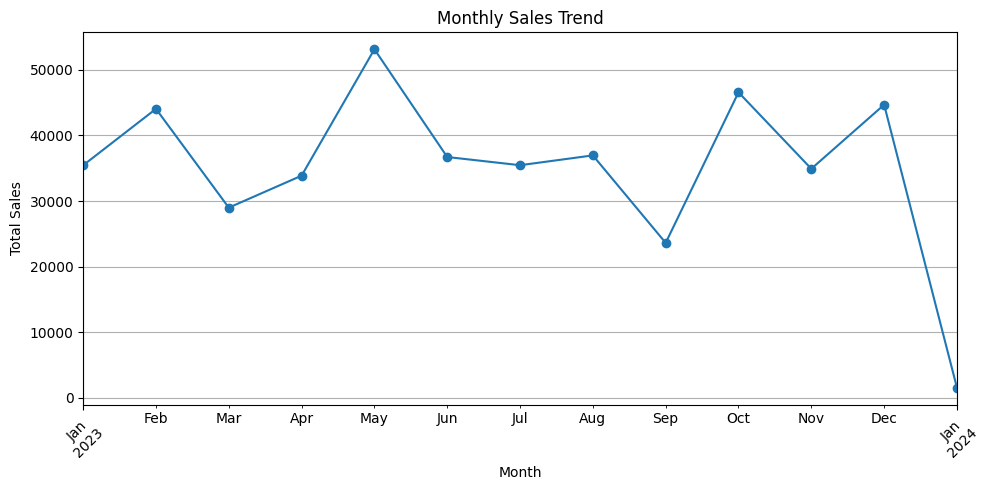

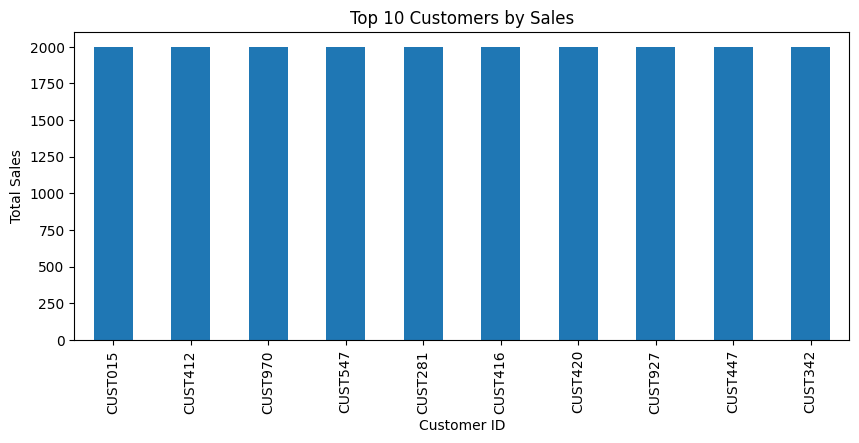

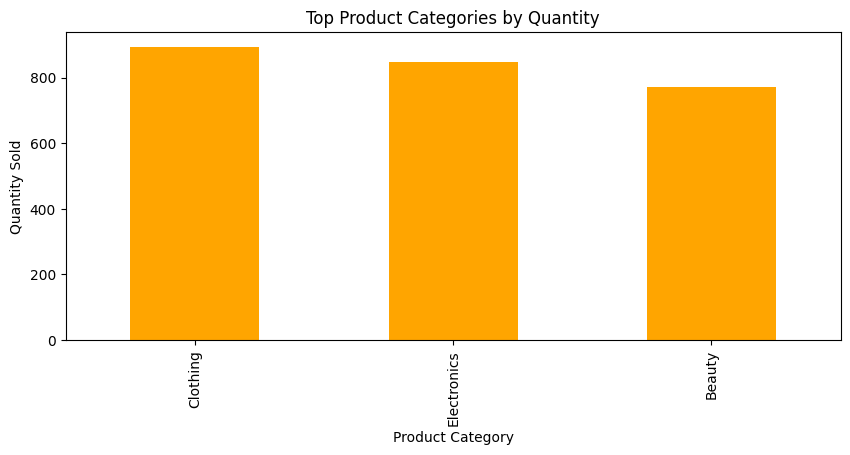

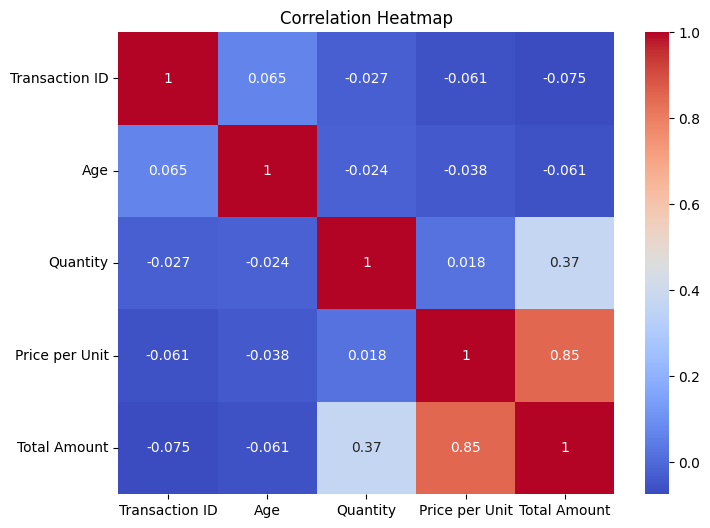

In [ ]:
import pandas as pd
from google.colab import files
import zipfile
import io
import matplotlib.pyplot as plt

uploaded=files.upload()

for filename in uploaded.keys():
  if filename.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
      zip_ref.extractall('.')
      for file_info in zip_ref.infolist():
        if file_info.filename.endswith('.csv'):
          df = pd.read_csv(file_info.filename)
          break
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std(numeric_only=True))
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales', figsize=(10,4))
plt.ylabel('Total Sales')
plt.show()
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', color='orange', title='Top Product Categories by Quantity', figsize=(10,4))
plt.ylabel('Quantity Sold')
plt.show()
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Saving archive (3).zip to archive (3).zip
Missing Values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Columns in the DataFrame:
 Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calo

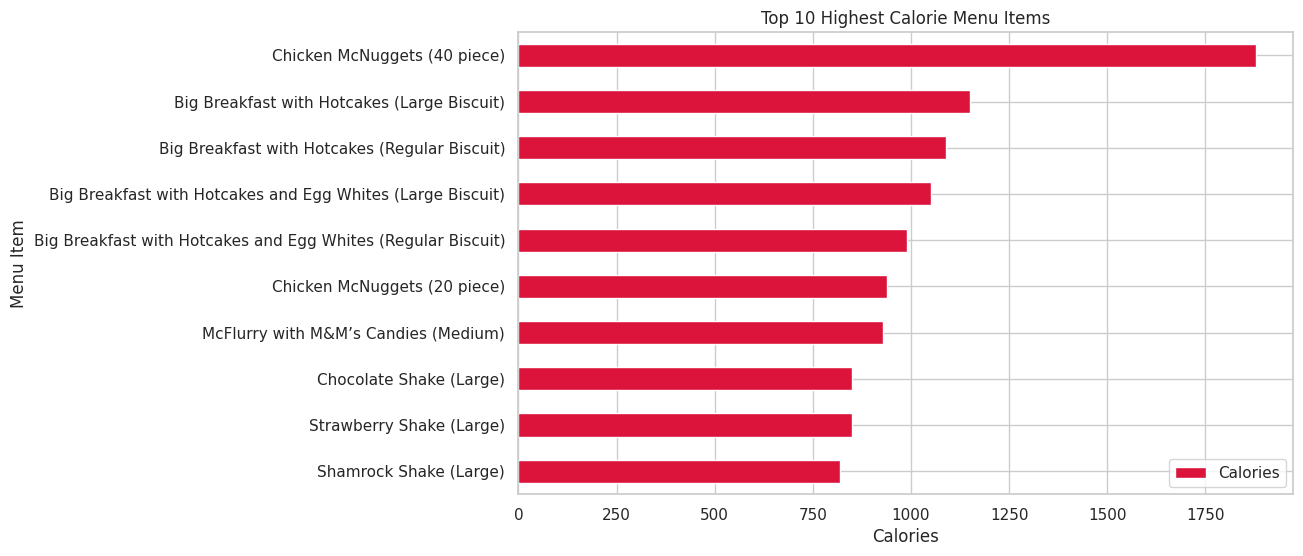

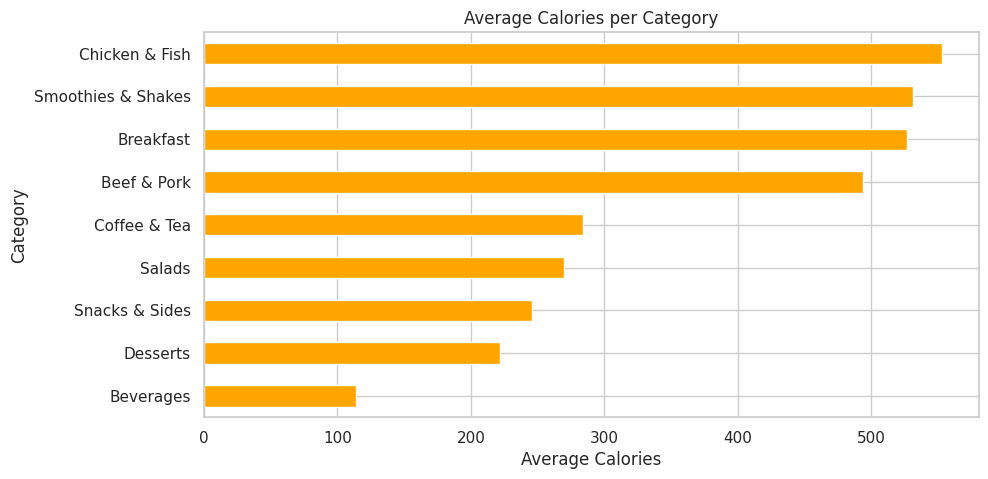

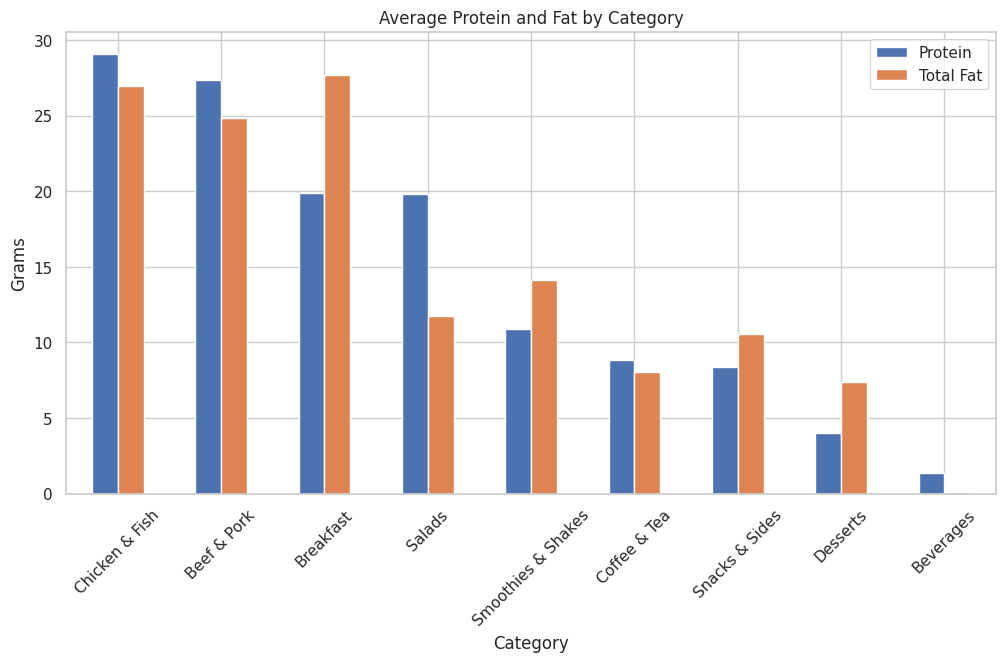

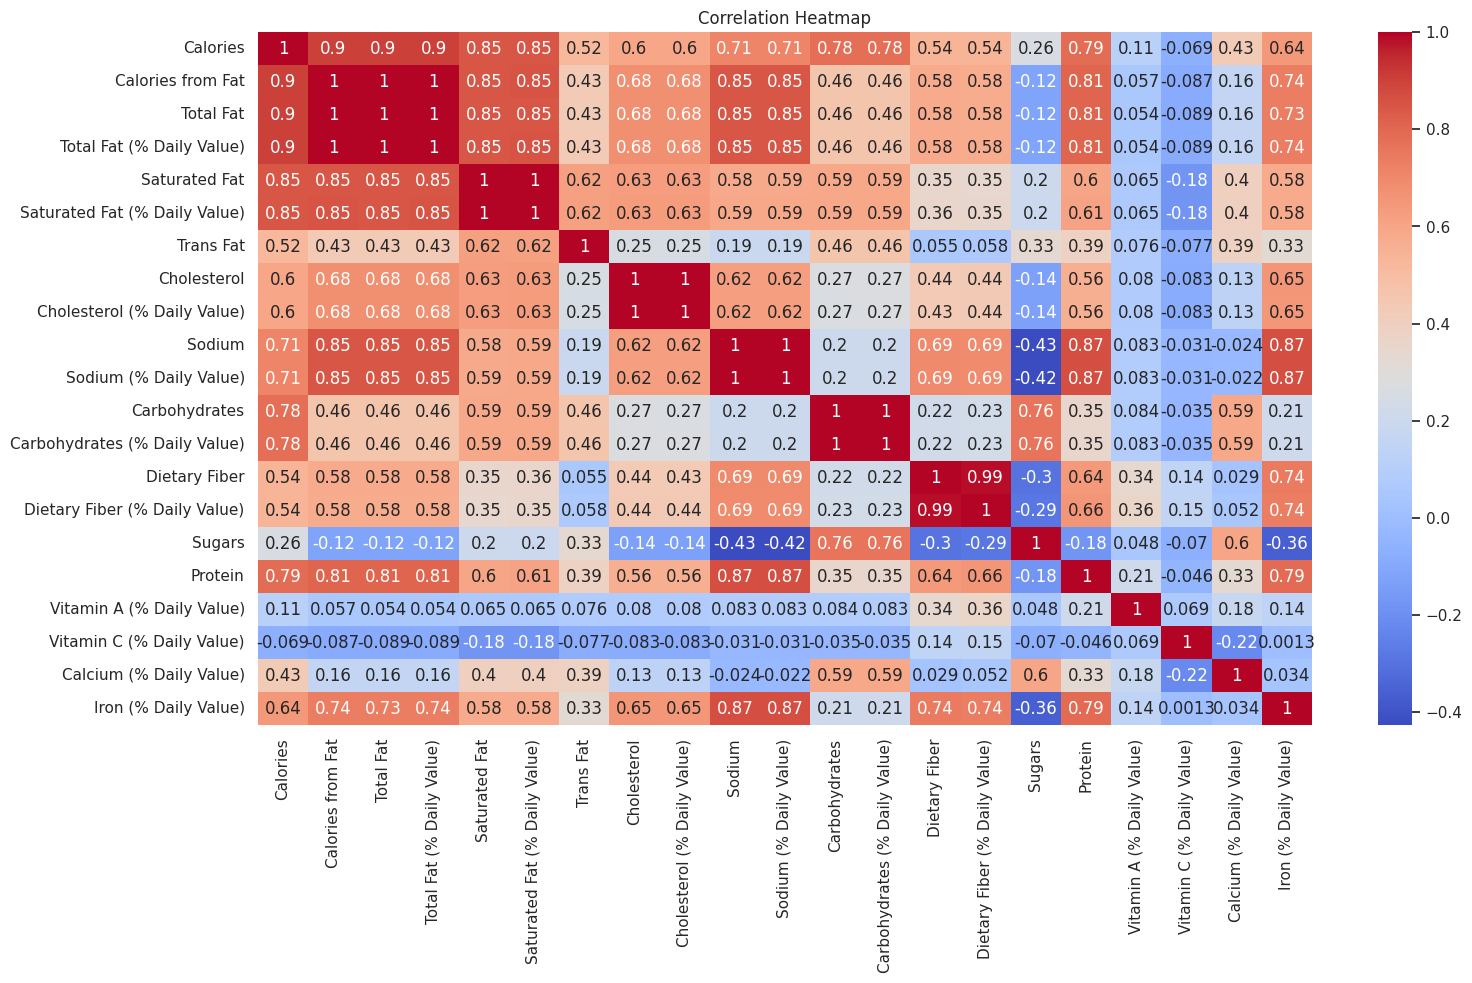

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import io
sns.set(style="whitegrid")
uploaded = files.upload()
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            zip_ref.extractall()
            for file_info in zip_ref.infolist():
                if file_info.filename.endswith('.csv'):
                    df = pd.read_csv(file_info.filename)
                    break

print("Missing Values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)
print("\nColumns in the DataFrame:\n", df.columns)
df.info()
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std(numeric_only=True))

top_calories = df[['Item', 'Calories']].sort_values(by='Calories', ascending=False).head(10)

top_calories.plot(kind='barh', x='Item', y='Calories', title='Top 10 Highest Calorie Menu Items', figsize=(10,6), color='crimson')
plt.xlabel('Calories')
plt.ylabel('Menu Item')
plt.gca().invert_yaxis()
plt.show()

avg_cals = df.groupby('Category')['Calories'].mean().sort_values()

avg_cals.plot(kind='barh', title='Average Calories per Category', figsize=(10,5), color='orange')
plt.xlabel("Average Calories")
plt.ylabel("Category")
plt.show()

nutrient_summary = df.groupby('Category')[['Protein', 'Total Fat']].mean().sort_values(by='Protein', ascending=False)

nutrient_summary.plot(kind='bar', figsize=(12,6), title='Average Protein and Fat by Category')
plt.ylabel('Grams')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(17, 9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
if 'Gender' in df.columns:
    gender_sales = df.groupby('Gender')['Total Amount'].sum()
    gender_sales.plot(kind='bar', title='Sales by Gender', color=['skyblue', 'lightgreen'])
    plt.ylabel('Total Sales')
    plt.show()